# Library imports

In [45]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# %matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy import stats

#from classes import color

# Data imports into pandas dataframe

In [46]:
df = pd.read_csv('data/p2-arbres-fr.csv', sep=';')
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

# Metadata Analysis

In [48]:
df.shape

(200137, 18)

<Axes: >

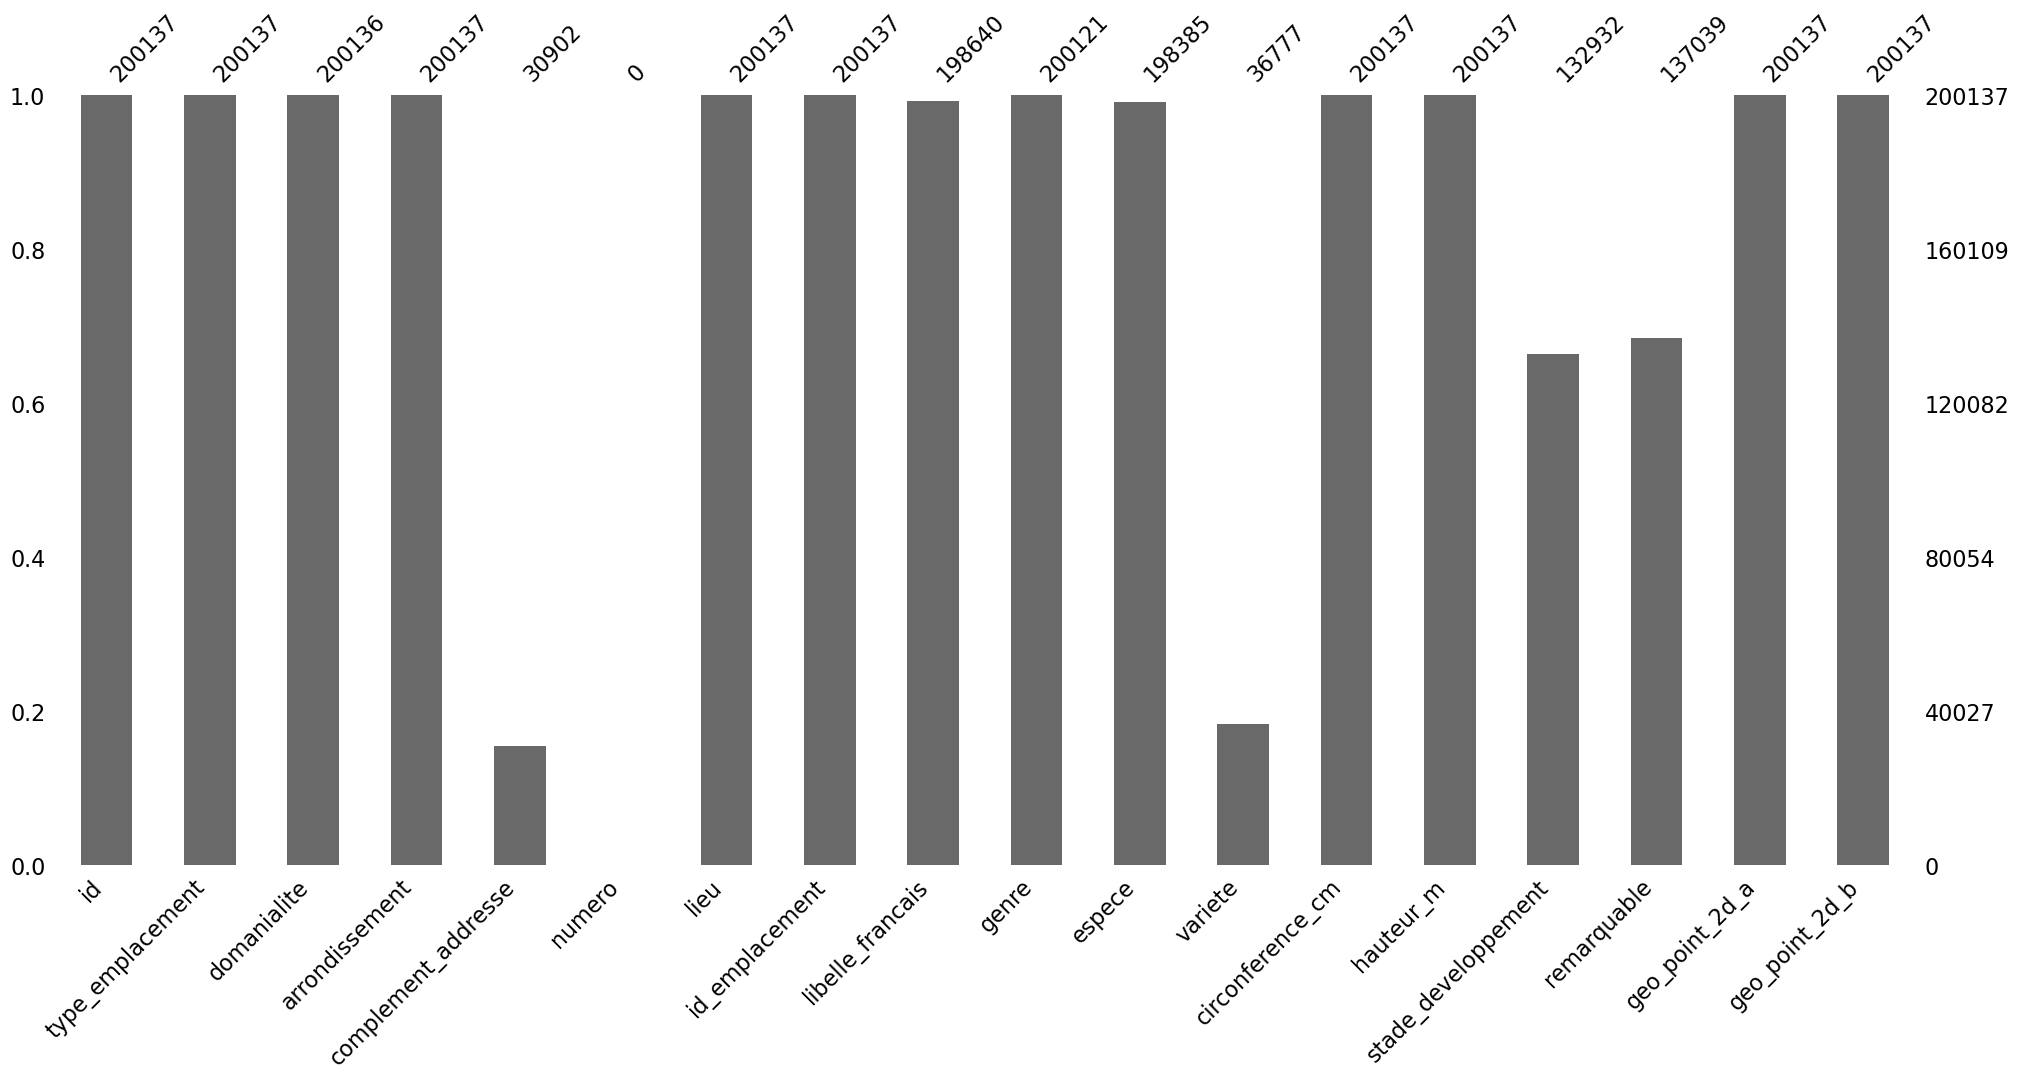

In [49]:
msno.bar(df)

Datas have 200 137 rows and 18 columns.
Nine of these columns have missing values :
- domanialite
- complement_addresse
- numero
- libelle_francais
- genre
- espece
- variete
- stade_developpement
- remarquable

<Axes: >

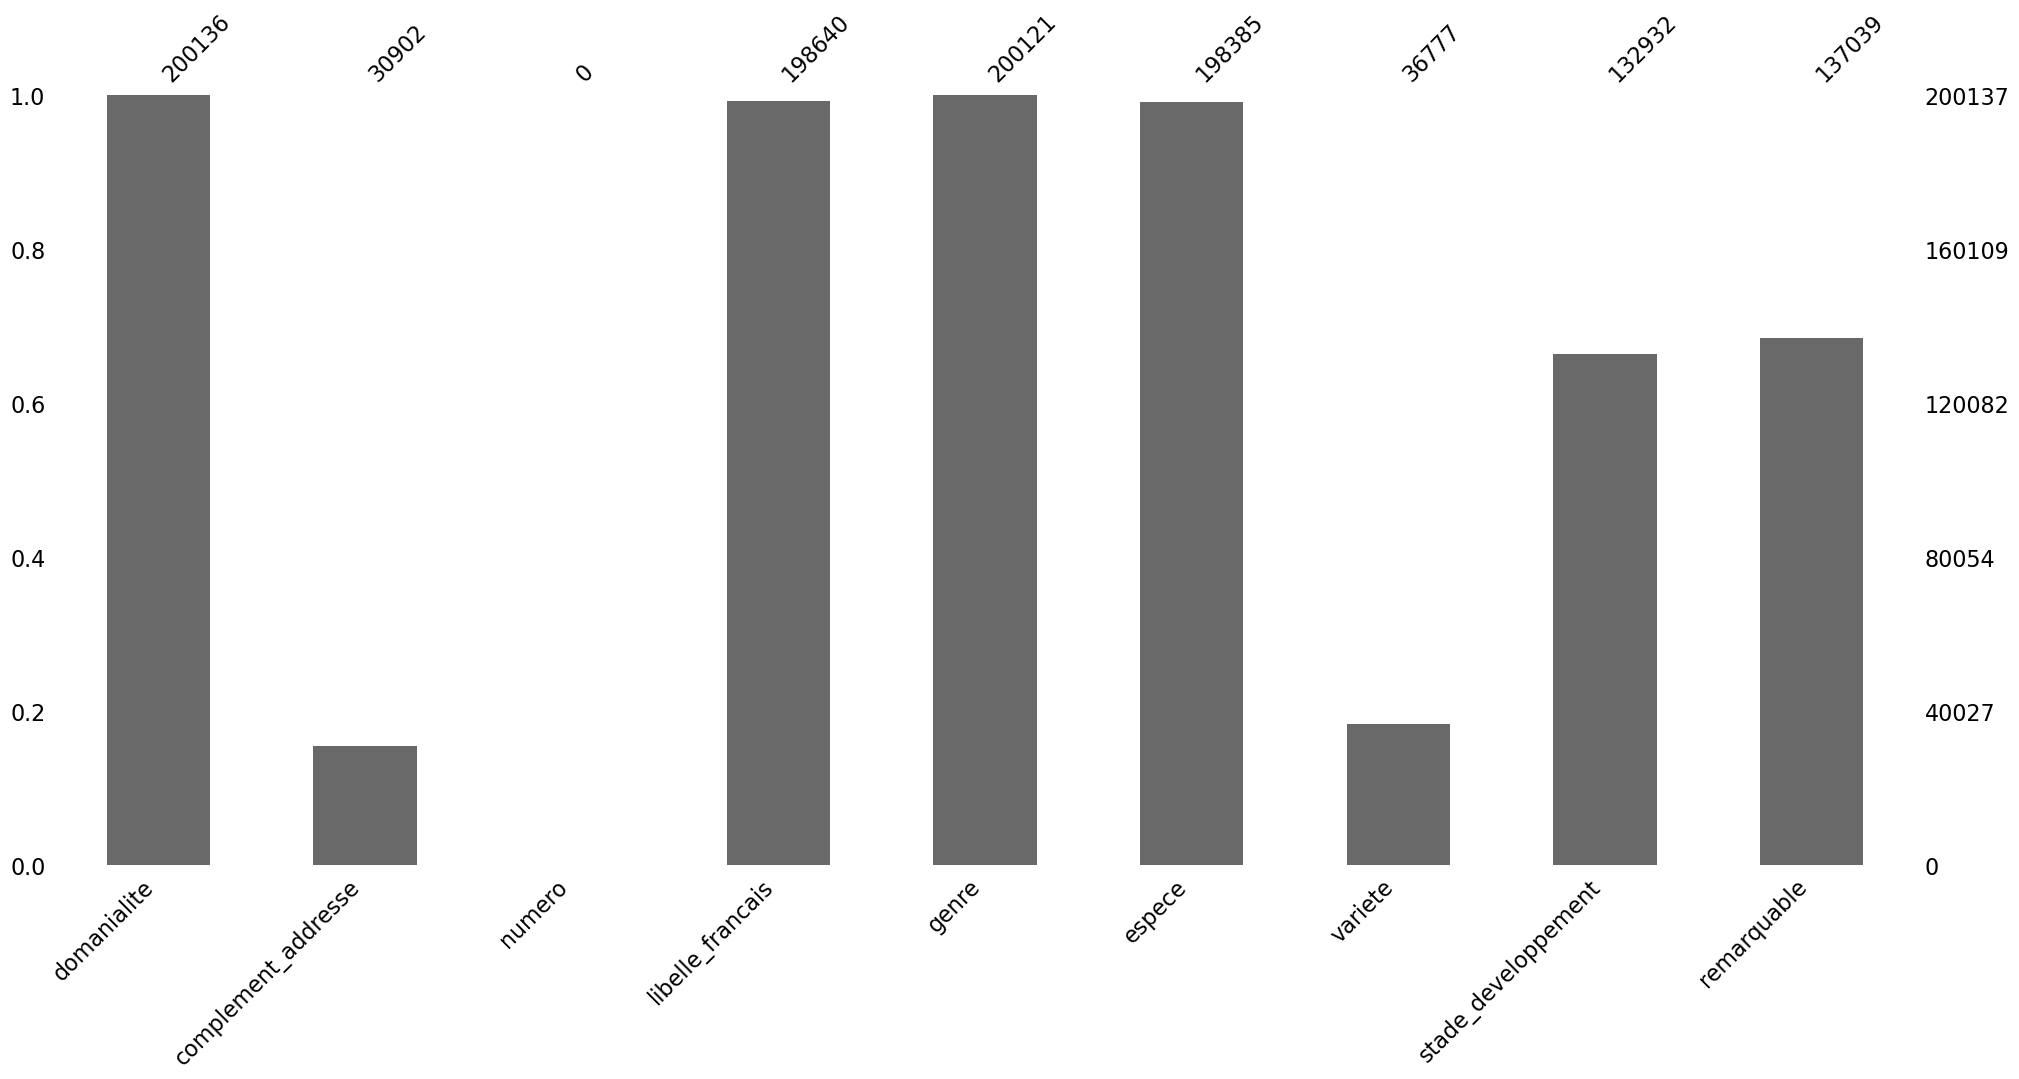

In [50]:
df_col_missingvalues = df[['domanialite', 'complement_addresse', 'numero', 'libelle_francais', 'genre', 'espece', 'variete', 'stade_developpement', 'remarquable']]
msno.bar(df_col_missingvalues)

<Axes: >

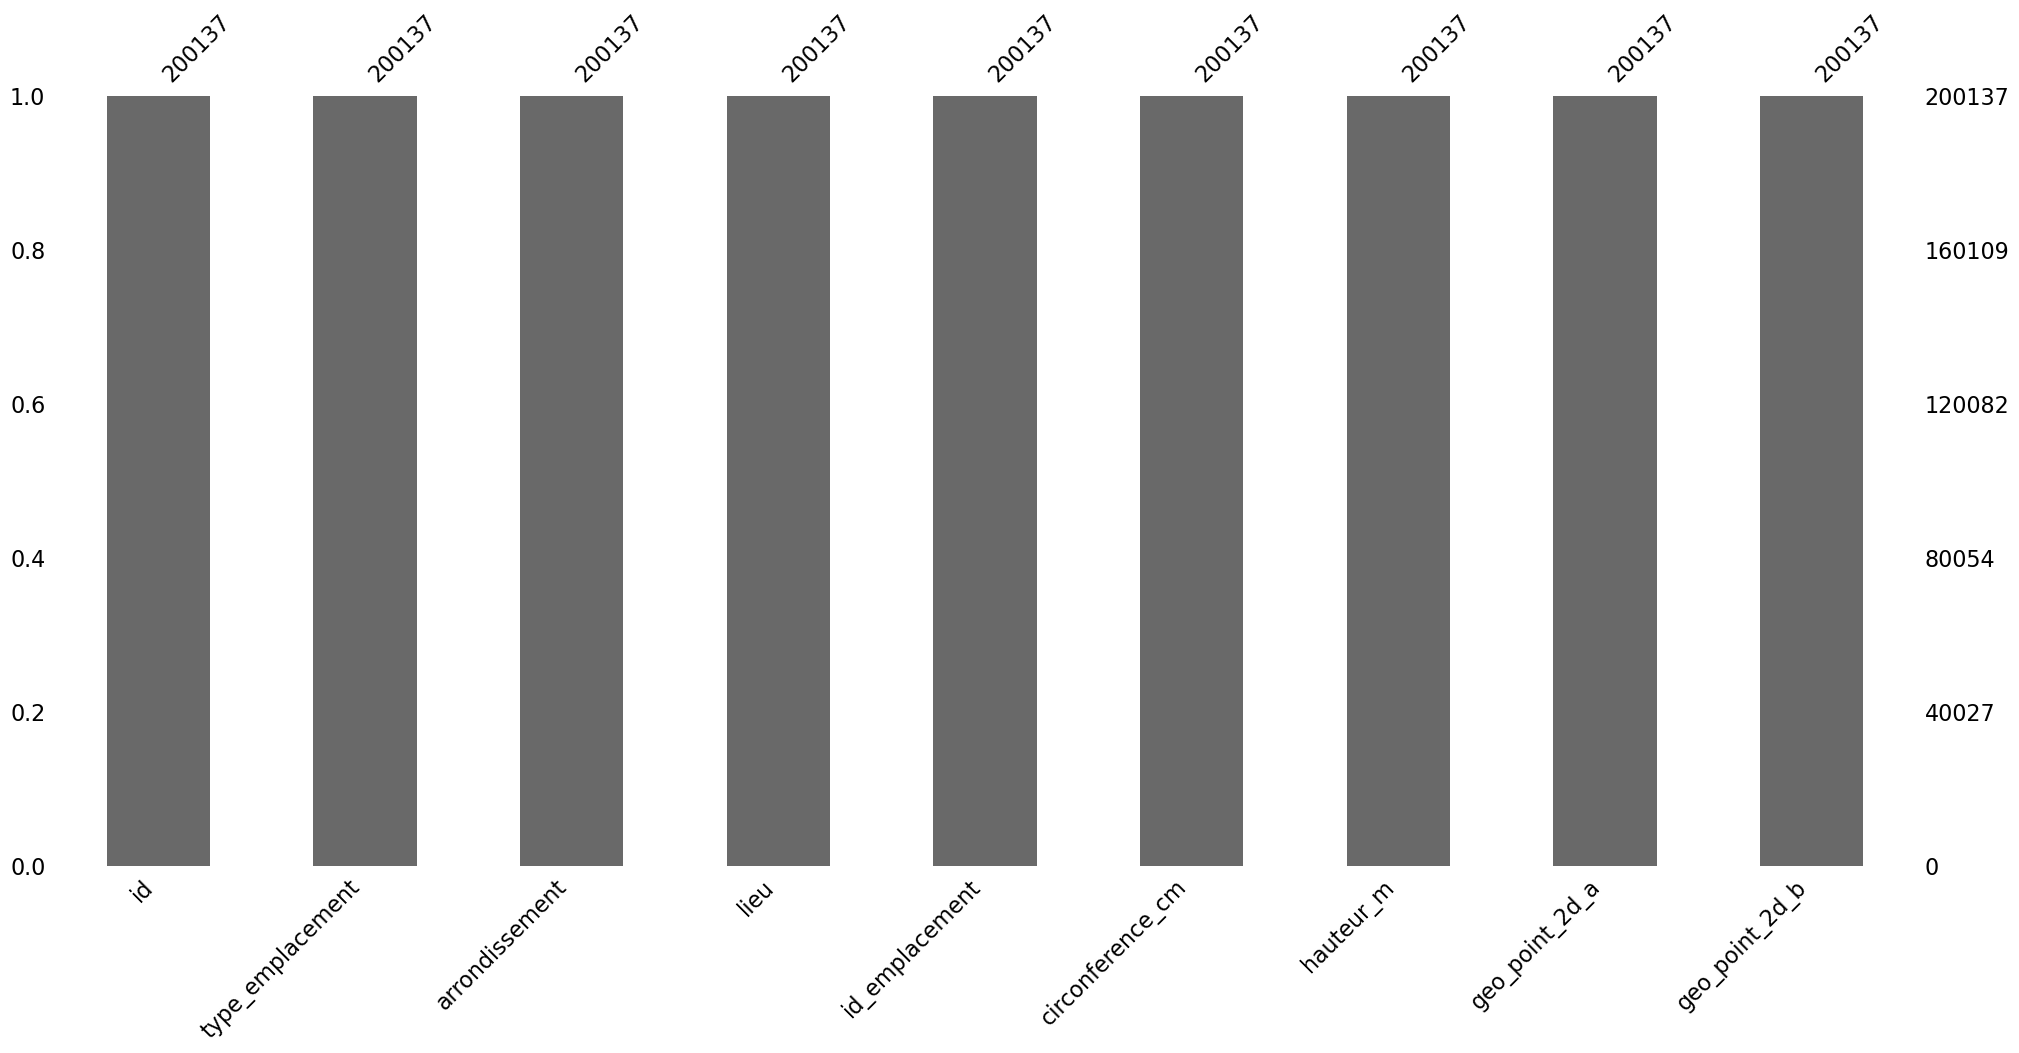

In [51]:
df_full = df.dropna(how='any', axis=1)
msno.bar(df_full)

# Missing values analysis

In [52]:
df.shape

(200137, 18)

## Numero

Since we have no values for this column, we can drop it.

In [53]:
df = df.drop(columns=['numero'])
df.shape

(200137, 17)

## Complement_addresse

Since we have geo_point_2d as location datas and we doesn't have missing datas in these columns, we can drop *complement_addresse*.

In [54]:
df = df.drop(columns=['complement_addresse'])
df.shape

(200137, 16)

## Domanialité
We have only one missing value for this column. We can check if we can retrieve it from the **lieu** column.
First, let's retrieve the **lieu** data for the missing value :

In [55]:
s_lieu_for_domanialiteisnull = df.loc[df['domanialite'].isnull(), 'lieu'].iloc[0]
s_lieu_for_domanialiteisnull

'JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / 7 RUE CRISTINO GARCIA'

Now, let's retrieve the **domanialite** datas (if any) for the **lieu** data we just retrieved :

In [56]:
ps_domanialite_from_lieu = df.loc[df['lieu'] == s_lieu_for_domanialiteisnull, 'domanialite']
ps_domanialite_from_lieu

10470     Jardin
10471     Jardin
10472     Jardin
10646     Jardin
10647     Jardin
           ...  
197248    Jardin
197249    Jardin
197250    Jardin
197251    Jardin
197254    Jardin
Name: domanialite, Length: 61, dtype: object

The missing value seems to be a **Jardin**. Just to be sure, let's check that our pandas series only contains *Jardin* : 

In [57]:
# Remove NaN values from ps_domanialite_from_lieu
ps_domanialite_from_lieu_cleaned = ps_domanialite_from_lieu.dropna()

# Check if ps_domanialite_from_lieu_cleaned has only 'Jardin' values
if ps_domanialite_from_lieu_cleaned.eq('Jardin').all():
    print("All values in ps_domanialite_from_lieu are 'Jardin'")
else:
    non_jardin_values = ps_domanialite_from_lieu_cleaned[ps_domanialite_from_lieu_cleaned != 'Jardin']
    print("Non-'Jardin' values in ps_domanialite_from_lieu:")
    print(non_jardin_values)


All values in ps_domanialite_from_lieu are 'Jardin'


Now that we are sure that our missing value is a *Jardin*, we can replace it in the **domanialite** column :

<Axes: >

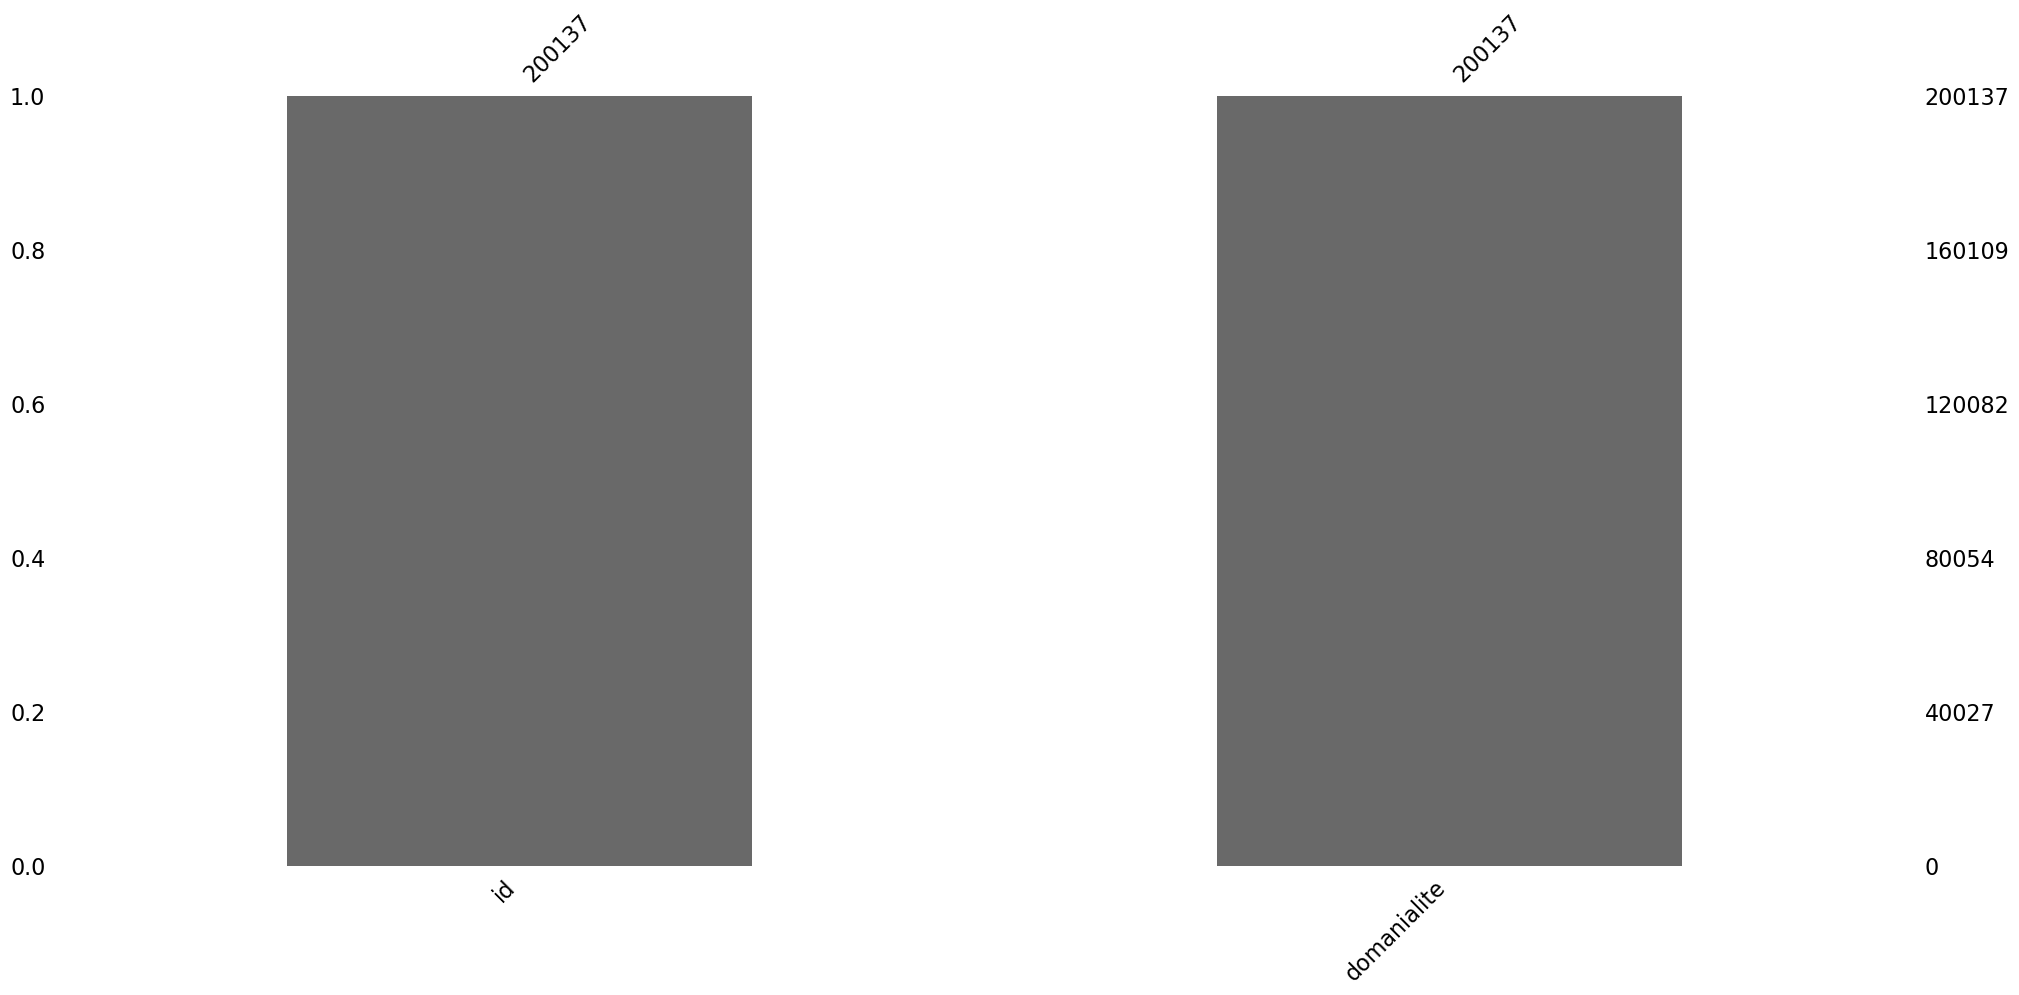

In [58]:
df.loc[df['domanialite'].isnull(), 'domanialite'] = 'Jardin'
msno.bar(df[['id', 'domanialite']])

### Libellé français

In [59]:
sub_df = df[['id', 'libelle_francais', 'genre', 'espece']]
sub_df.head()

,id,libelle_francais,genre,espece
0,99874,Marronnier,Aesculus,hippocastanum
1,99875,If,Taxus,baccata
2,99876,If,Taxus,baccata
3,99877,Erable,Acer,negundo
4,99878,Arbre à miel,Tetradium,daniellii


Let's check if we can retrieve the missing value from the **genre** and **espece** columns :

In [60]:
sub_df = sub_df[sub_df['libelle_francais'].isna()]
sub_df

,id,libelle_francais,genre,espece
528,100589,NaN,Crataegus,japonica
1416,101521,NaN,Cladrastis,lawsoniana
2727,103209,NaN,Pinus,sylvestris
5282,106682,NaN,Sorbus,aria
5287,106687,NaN,Staphylea,colchica
...,...,...,...,...
200120,2024729,NaN,Magnolia,obovata
200121,2024730,NaN,Magnolia,delavayi subsp. potaninii
200128,2024737,NaN,Parrotia,n. sp.
200129,2024738,NaN,Non spécifié,sinensis


Now, for each pair of **genre** and **espece**, let's check in our pandas dataframe if we have a **libelle_francais** :
First, let's retrieve the **genre** and **espece** datas for the missing value :

In [61]:
pge_sub_df = sub_df[['genre', 'espece']].drop_duplicates(subset=['genre', 'espece'])
pge_df_sorted = pge_sub_df.sort_values(by='genre')
pge_df_sorted

,genre,espece
199256,Abies,wilsonii
53342,Acca,sellowiana
18168,Acer,cappadocicum
153066,Acer,occidentalis
195573,Acer,monogyna
...,...,...
87244,Zelkova,n. sp.
108723,Zelkova,carpinifolia
194953,x Chitalpa,NaN
199193,x Sorbopyrus,n. sp.


Now, let's retrieve the **libelle_francais** datas (if any) for the **genre** and **espece** datas we just retrieved :

In [62]:
l_genre = pge_df_sorted['genre'].tolist()
l_espece = pge_df_sorted['espece'].tolist()
retrieved_values = []
for i in range (len(l_genre)):
    print("Index : {}".format(i))
    print("Genre : {}".format(l_genre[i]))
    print("Espece : {}".format(l_espece[i]))
    unique_values = df.loc[(df['genre'] == l_genre[i]) & (df['espece'] == l_espece[i]), 'libelle_francais'].unique()
    if unique_values.size > 0:
        print("Retrieved : {}".format(unique_values[0]))
        retrieved_values.append(unique_values[0])
    else:
        print("No value found")
        retrieved_values.append('No value found')
    print()

Index : 0
Genre : Abies
Espece : wilsonii
Retrieved : nan

Index : 1
Genre : Acca
Espece : sellowiana
Retrieved : nan

Index : 2
Genre : Acer
Espece : cappadocicum
Retrieved : Erable

Index : 3
Genre : Acer
Espece : occidentalis
Retrieved : nan

Index : 4
Genre : Acer
Espece : monogyna
Retrieved : nan

Index : 5
Genre : Acer
Espece : triacanthos
Retrieved : nan

Index : 6
Genre : Acer
Espece : pseudoplatanus
Retrieved : Erable

Index : 7
Genre : Acer
Espece : n. sp.
Retrieved : Erable

Index : 8
Genre : Acer
Espece : x conspicuum
Retrieved : nan

Index : 9
Genre : Acer
Espece : campestre
Retrieved : Erable

Index : 10
Genre : Acer
Espece : platanoides
Retrieved : Erable

Index : 11
Genre : Acer
Espece : hippocastanum
Retrieved : nan

Index : 12
Genre : Acer
Espece : nigra
Retrieved : nan

Index : 13
Genre : Acer
Espece : tomentosa
Retrieved : nan

Index : 14
Genre : Acer
Espece : saccharinum
Retrieved : Erable

Index : 15
Genre : Acer
Espece : nan
No value found

Index : 16
Genre : Ace

In [63]:
pge_df_sorted['libelle_francais'] = retrieved_values

Let's see the results :

In [64]:
pge_df_sorted

,genre,espece,libelle_francais
199256,Abies,wilsonii,NaN
53342,Acca,sellowiana,NaN
18168,Acer,cappadocicum,Erable
153066,Acer,occidentalis,NaN
195573,Acer,monogyna,NaN
...,...,...,...
87244,Zelkova,n. sp.,Orme de Sibérie
108723,Zelkova,carpinifolia,Orme de Sibérie
194953,x Chitalpa,NaN,No value found
199193,x Sorbopyrus,n. sp.,NaN


In [65]:
count_no_value_found = pge_df_sorted['libelle_francais'].eq('No value found').sum()
print("We can still count {} pairs of genre/espece for which we have no libelle_francais".format(count_no_value_found))

We can still count 45 pairs of genre/espece for which we have no libelle_francais


In [66]:
pge_df_sorted[pge_df_sorted['libelle_francais'] == 'No value found']

,genre,espece,libelle_francais
83730,Acer,NaN,No value found
184024,Aesculus,NaN,No value found
115220,Ailanthus,NaN,No value found
169086,Alnus,NaN,No value found
89726,Amelanchier,NaN,No value found
186998,Betula,NaN,No value found
198310,Broussonetia,NaN,No value found
198332,Buxus,NaN,No value found
83310,Carpinus,NaN,No value found
22327,Cedrus,NaN,No value found


All of our "No value found" values except one could not be retrieved because of missing values in the **espece** column. We can also notice that we have missing pairs of **genre** and **espece**.

We have good results for the **genre** and **espece** datas we retrieved. We can replace the missing value in the **libelle_francais** column. For the other missing values, we will replace them with "No value found" for now and we will try to classify them later with specific algorithms.

In [67]:
fge_nan_df = df[df['libelle_francais'].isna()]
fge_nan_df = fge_nan_df[['id','genre','espece']]
libfr_df = fge_nan_df.join(pge_df_sorted.set_index(['genre','espece']), on=['genre', 'espece'], how='left', lsuffix='_left', rsuffix='_right')
libfr_df.head()

,id,genre,espece,libelle_francais
528,100589,Crataegus,japonica,NaN
1416,101521,Cladrastis,lawsoniana,NaN
2727,103209,Pinus,sylvestris,Pin
5282,106682,Sorbus,aria,Alisier
5287,106687,Staphylea,colchica,NaN


In [68]:
libfr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 528 to 200132
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1497 non-null   int64 
 1   genre             1481 non-null   object
 2   espece            1132 non-null   object
 3   libelle_francais  1024 non-null   object
dtypes: int64(1), object(3)
memory usage: 58.5+ KB


**We retrieved about 2/3 of the missing values for the libelle_francais column.**

In [69]:
df[['libelle_francais']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   libelle_francais  198640 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


Now, let's replace the missing values in the **libelle_francais** column :

In [70]:
dfj = df.join(libfr_df.set_index('id'), on='id', how='left', lsuffix='_left', rsuffix='_right')
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      200137 non-null  int64  
 1   type_emplacement        200137 non-null  object 
 2   domanialite             200137 non-null  object 
 3   arrondissement          200137 non-null  object 
 4   lieu                    200137 non-null  object 
 5   id_emplacement          200137 non-null  object 
 6   libelle_francais_left   198640 non-null  object 
 7   genre_left              200121 non-null  object 
 8   espece_left             198385 non-null  object 
 9   variete                 36777 non-null   object 
 10  circonference_cm        200137 non-null  int64  
 11  hauteur_m               200137 non-null  int64  
 12  stade_developpement     132932 non-null  object 
 13  remarquable             137039 non-null  float64
 14  geo_point_2d_a      

In [71]:
dfj['libelle_francais_left'].fillna(dfj['libelle_francais_right'], inplace=True)
del dfj['libelle_francais_right']
del dfj['genre_right']
del dfj['espece_right']
dfj.rename(columns={'libelle_francais_left':'libelle_francais'}, inplace=True)
dfj.rename(columns={'genre_left':'genre'}, inplace=True)
dfj.rename(columns={'espece_left':'espece'}, inplace=True)
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200137 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     199664 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   variete              36777 non-null   object 
 10  circonference_cm     200137 non-null  int64  
 11  hauteur_m            200137 non-null  int64  
 12  stade_developpement  132932 non-null  object 
 13  remarquable          137039 non-null  float64
 14  geo_point_2d_a       200137 non-null  float64
 15  geo_point_2d_b   

<Axes: >

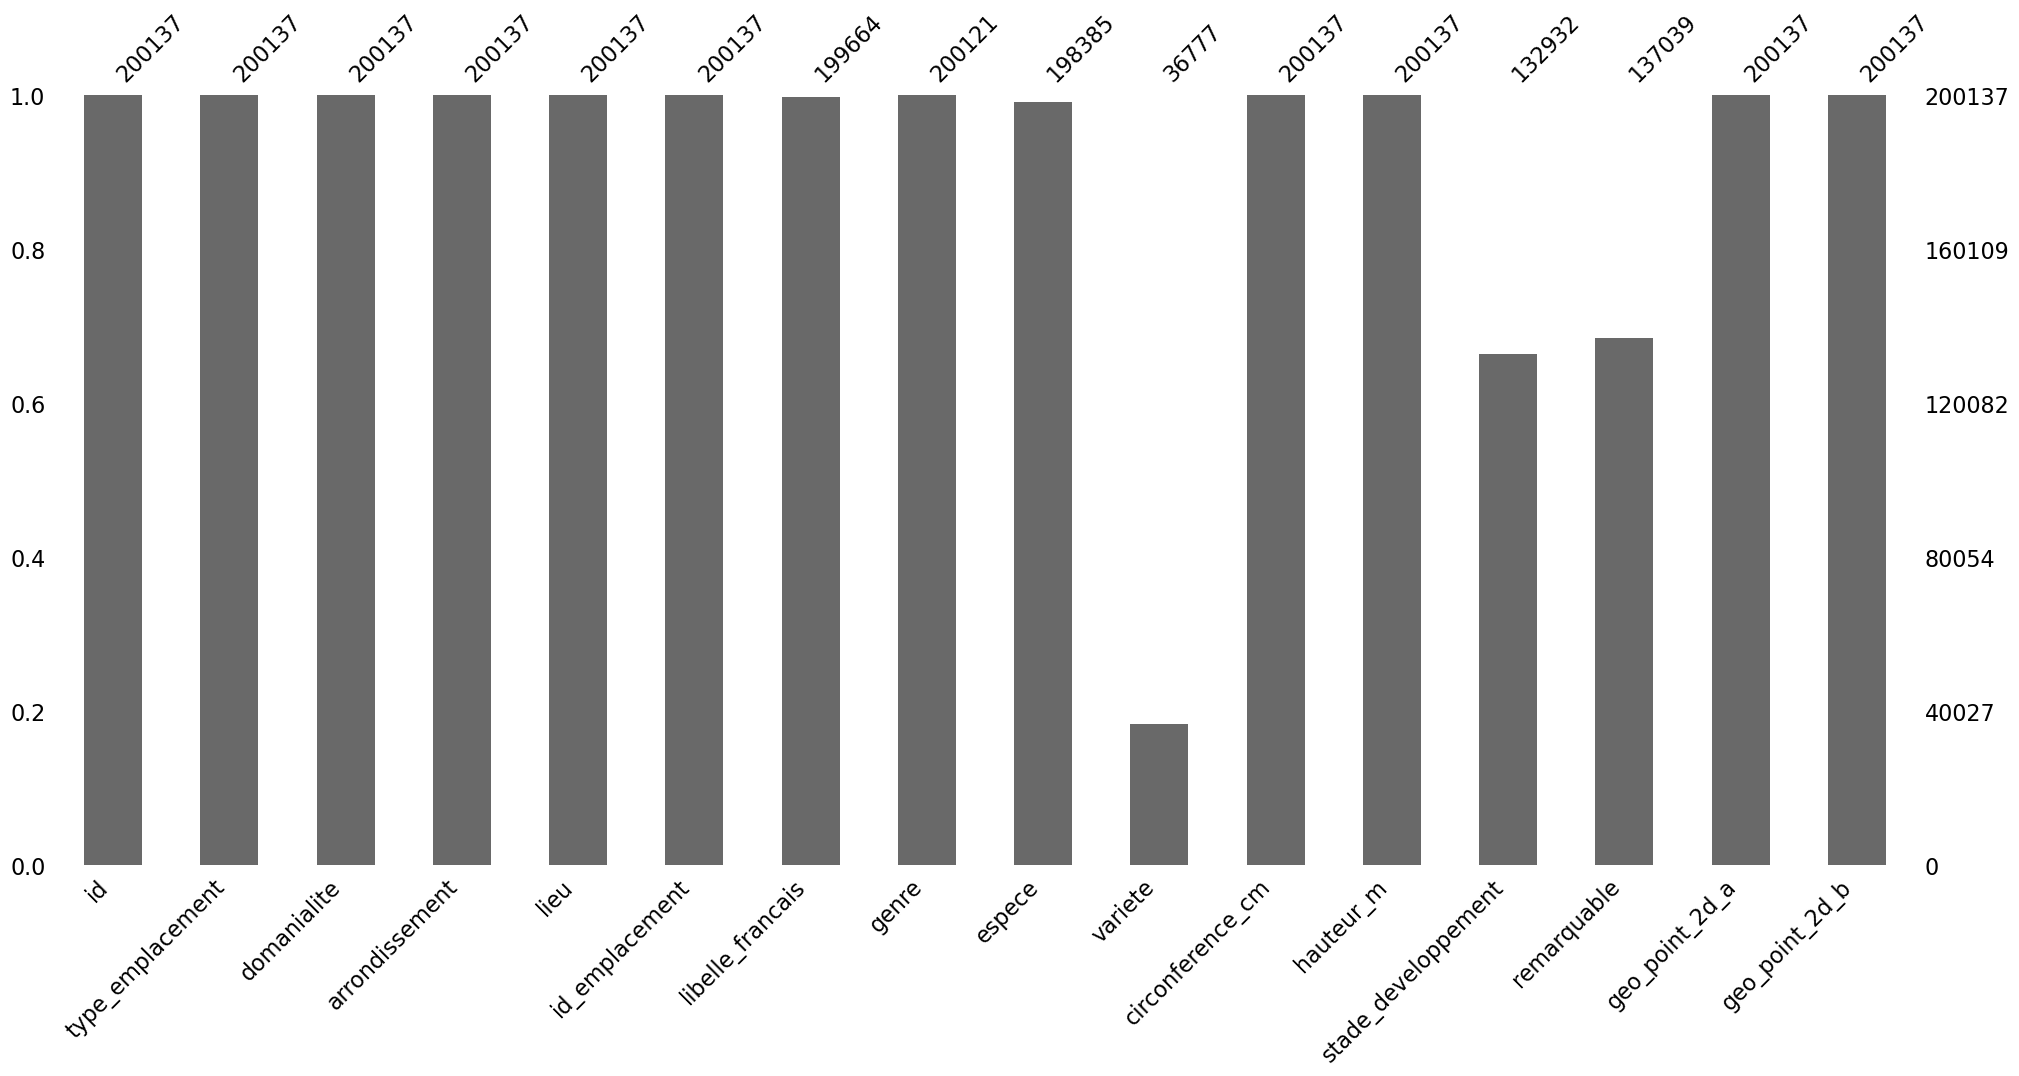

In [72]:
msno.bar(dfj)

# Removing useless columns

We will now remove the columns that we don't need for the upcoming analysis:
- lieu
- id_emplacement
- genre
- espece
- variete

In [75]:
df = dfj.copy()
col_to_drop = ['lieu', 'id_emplacement', 'genre', 'espece','variete']
df = df.drop(columns = col_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200137 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   libelle_francais     199664 non-null  object 
 5   circonference_cm     200137 non-null  int64  
 6   hauteur_m            200137 non-null  int64  
 7   stade_developpement  132932 non-null  object 
 8   remarquable          137039 non-null  float64
 9   geo_point_2d_a       200137 non-null  float64
 10  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 16.8+ MB


In [76]:
df['stade_developpement'].unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

In [77]:
df['remarquable'].unique()

array([ 0., nan,  1.])

# Drop NA in libelle_francais

In [86]:
df.dropna(subset=['libelle_francais'], inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199664 entries, 0 to 200136
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   199664 non-null  int64  
 1   type_emplacement     199664 non-null  object 
 2   domanialite          199664 non-null  object 
 3   arrondissement       199664 non-null  object 
 4   libelle_francais     199664 non-null  object 
 5   circonference_cm     199664 non-null  int64  
 6   hauteur_m            199664 non-null  int64  
 7   stade_developpement  132555 non-null  object 
 8   remarquable          136566 non-null  float64
 9   geo_point_2d_a       199664 non-null  float64
 10  geo_point_2d_b       199664 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 18.3+ MB


# BoxPlot

<Axes: >

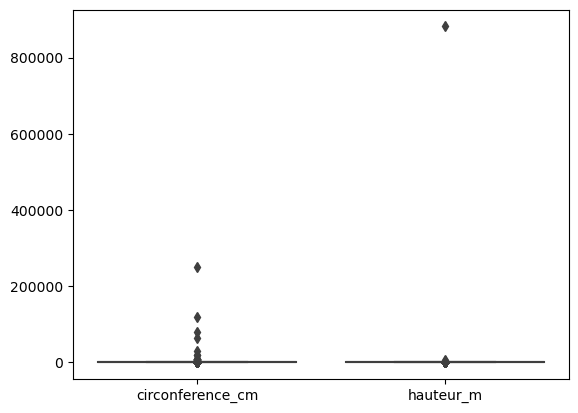

In [95]:
numerical_columns = df[['circonference_cm', 'hauteur_m']]
sns.boxplot(data=numerical_columns)


In [89]:
def find_outliers_interquartile(data, column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers



In [100]:
circ_outliers_df = find_outliers_interquartile(df, 'circonference_cm')
circ_outliers_df.shape

(3408, 11)

In [101]:
hau_outliers_df = find_outliers_interquartile(df, 'hauteur_m')
hau_outliers_df.shape

(3903, 11)

In [102]:
# Create a new dataframe without outliers
df_no_outliers = df[~df.index.isin(circ_outliers_df.index) & ~df.index.isin(hau_outliers_df.index)]

df_no_outliers.shape


(193525, 11)

<Axes: >

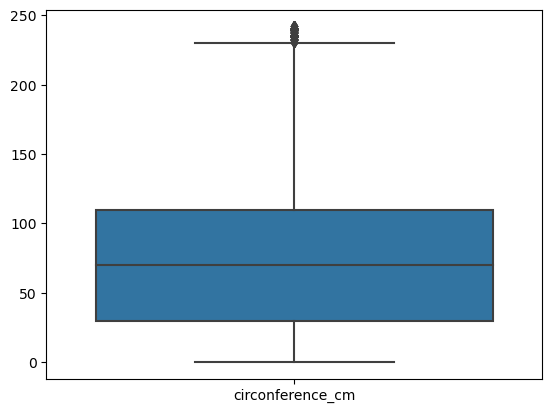

In [107]:
numerical_columns = df_no_outliers[['circonference_cm']]
sns.boxplot(data=numerical_columns)

<Axes: >

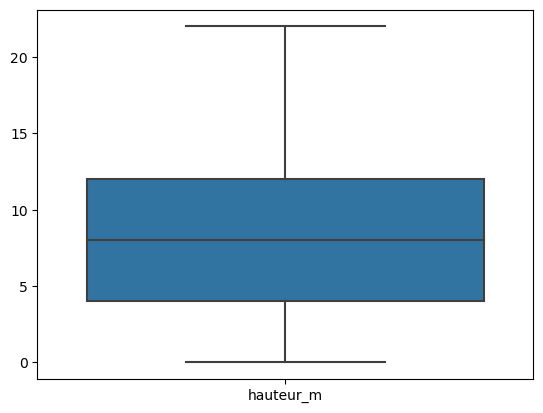

In [106]:
numerical_columns = df_no_outliers[['hauteur_m']]
sns.boxplot(data=numerical_columns)

In [108]:
df.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'libelle_francais', 'circonference_cm', 'hauteur_m',
       'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [119]:
for col in df.columns:
    exclude = ['id', 'circonference_cm', 'hauteur_m', 'geo_point_2d_a', 'geo_point_2d_b']
    if col not in exclude:
        print(df[col].value_counts())
        print("Number of unique values in column : {}".format(len(df[col].unique())))
        print()

type_emplacement
Arbre    199664
Name: count, dtype: int64
Number of unique values in column : 1

domanialite
Alignement      104660
Jardin           46131
CIMETIERE        31901
DASCO             6411
PERIPHERIQUE      5322
DJS               3890
DFPE              1324
DAC                 21
DASES                4
Name: count, dtype: int64
Number of unique values in column : 9

arrondissement
PARIS 15E ARRDT      17133
PARIS 13E ARRDT      16667
PARIS 16E ARRDT      16400
PARIS 20E ARRDT      15324
PARIS 19E ARRDT      13662
PARIS 12E ARRDT      12575
SEINE-SAINT-DENIS    11566
PARIS 14E ARRDT      11379
BOIS DE VINCENNES    11313
PARIS 17E ARRDT      10752
PARIS 18E ARRDT       9994
PARIS 7E ARRDT        8590
VAL-DE-MARNE          7579
PARIS 8E ARRDT        7244
PARIS 11E ARRDT       5652
HAUTS-DE-SEINE        5296
BOIS DE BOULOGNE      3972
PARIS 10E ARRDT       3381
PARIS 4E ARRDT        2736
PARIS 5E ARRDT        2365
PARIS 6E ARRDT        1762
PARIS 1ER ARRDT       1406
PARIS 3E 

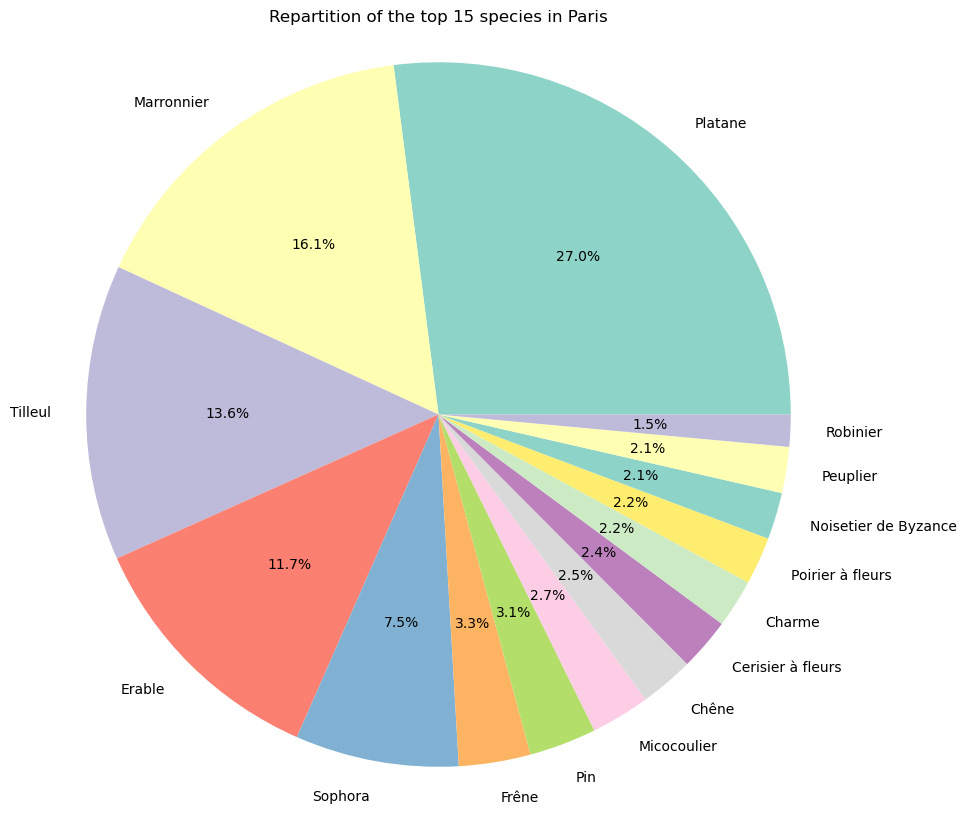

In [131]:
top_10_libelle = df['libelle_francais'].value_counts().head(15)
# Create a pie chart
plt.figure(figsize=(10, 10))
sns.set_palette("Set3")
plt.pie(top_10_libelle, labels=top_10_libelle.index, autopct='%1.1f%%')
plt.title("Repartition of the top 15 species in Paris")
plt.axis('equal')
plt.show()



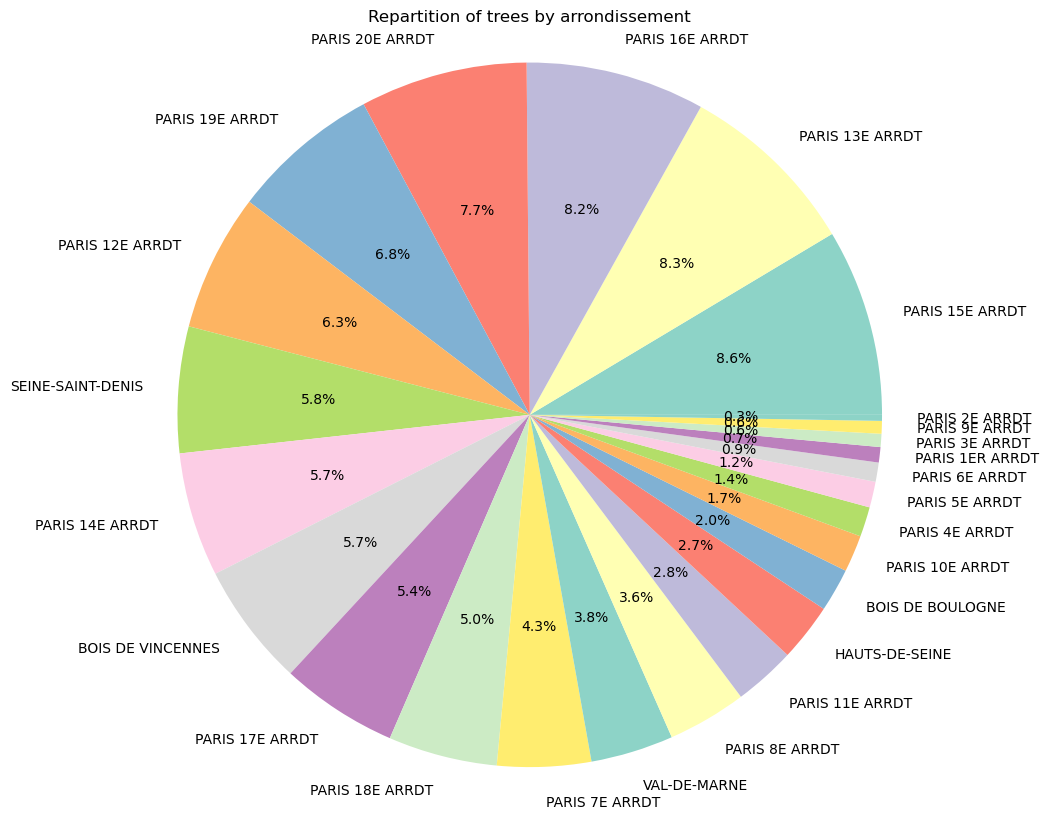

In [128]:
top_10_arrondissement = df['arrondissement'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 10))
sns.set_palette("Set3")
plt.pie(top_10_arrondissement, labels=top_10_arrondissement.index, autopct='%1.1f%%')
plt.title("Repartition of trees by arrondissement")
plt.axis('equal')
plt.show()

Since DAC and DASES have only about thirty trees, we will remove them from the analysis.

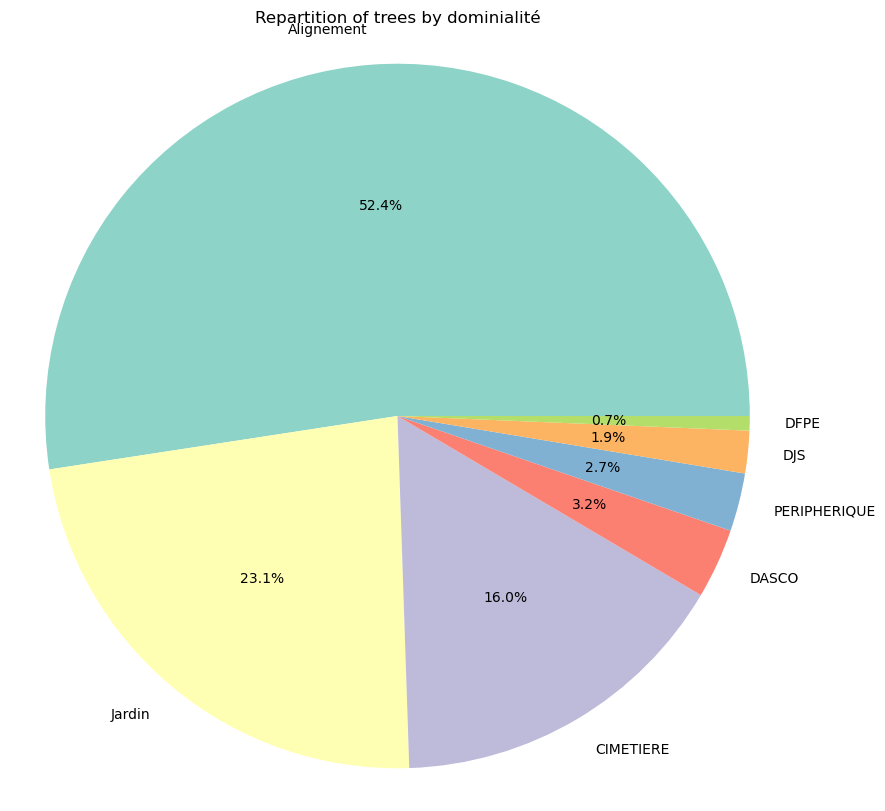

In [140]:
doma_df = df[df['domanialite'] != 'DAC']
doma_df = doma_df[doma_df['domanialite'] != 'DASES']
top_10_dominialite = doma_df['domanialite'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 10))
sns.set_palette("Set3")
plt.pie(top_10_dominialite, labels=top_10_dominialite.index, autopct='%1.1f%%')
plt.title("Repartition of trees by dominialité")
plt.axis('equal')
plt.show()

# Development stage